## Dimensionality Reduction in Python

### CHAPTER 1. Exploring High Dimensional Data

#### 1.1 Introduction

* Dimension of data -> number of columns in dataset
* Observations -> number of rows in dataset

In [1]:
# finding number of dimensions
import pandas as pd

pokemon_df = pd.read_csv('7_datasets/pokemon.csv')
print(pokemon_df.shape)
# print(pokemon_df.head())
# dimensions / number of columns is 13

(800, 13)


In [2]:
# removing featurese without variance
# find feature with .describe() method
print(pokemon_df.describe())

# find subset of dataset
number_cols = ['HP', 'Attack', 'Defense']
non_number_cols = ['Name', 'Type 1']
df_selected = pokemon_df[number_cols + non_number_cols]

# print info
print(df_selected.head())
print(df_selected.describe(exclude='number'))

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

#### 1.2 Feature selection vs. feature extraction

Why reduce dimensionality?

Your dataset will:
* Be less complex
* Require less disk space
* Require less computation time
* Have lower chance of model over-fitting

Feature selection:
* Select features ONLY select subset of features you think is important, and drop the other ones

Feature extraction:
* Calculate or extract new features from the original ones, these new features have as little redundant information as possible

In [3]:
# visually detecting redundant features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()

# get dataset basic info
print(ansur_df.info())
print(ansur_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           6068 non-null   int64  
 1   Branch                          6068 non-null   object 
 2   Component                       6068 non-null   object 
 3   Gender                          6068 non-null   object 
 4   abdominalextensiondepthsitting  6068 non-null   int64  
 5   acromialheight                  6068 non-null   int64  
 6   acromionradialelength           6068 non-null   int64  
 7   anklecircumference              6068 non-null   int64  
 8   axillaheight                    6068 non-null   int64  
 9   balloffootcircumference         6068 non-null   int64  
 10  balloffootlength                6068 non-null   int64  
 11  biacromialbreadth               6068 non-null   int64  
 12  bicepscircumferenceflexed       6

In [4]:
ansur_df.head()

,index,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [5]:
# create new columns
ansur_df['body_height'] = ansur_df['stature_m'] * 39.37
ansur_df['n_legs'] = 2

# get two subset datasets
cols_1 = ['Gender', 'weight_kg', 'stature_m', 'body_height']
cols_2 = ['Gender', 'footlength', 'headlength', 'n_legs']
ansur_df_1 = ansur_df[cols_1]
ansur_df_2 = ansur_df[cols_2]


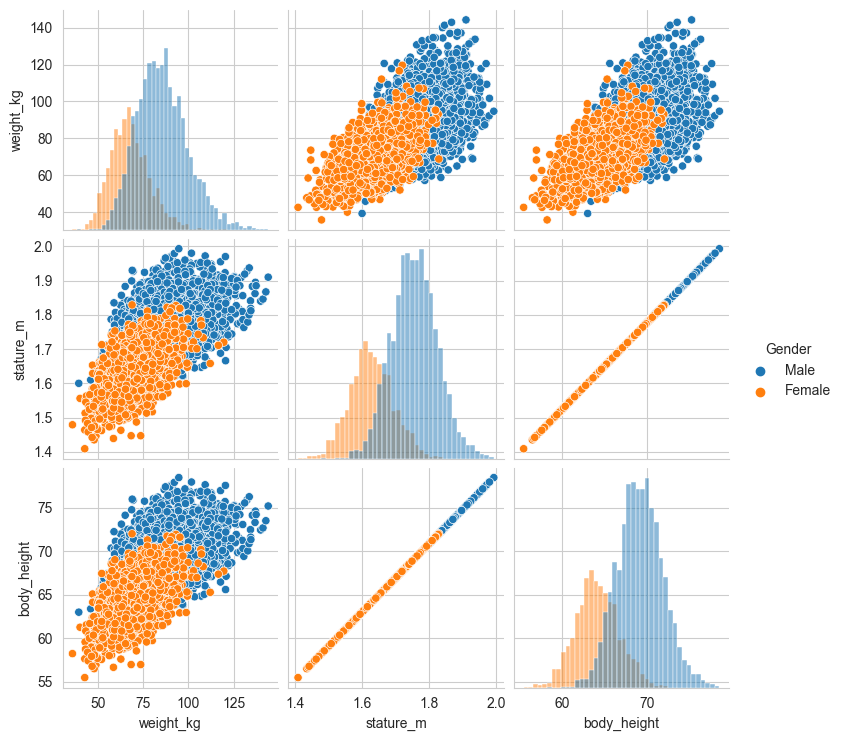

In [6]:
# create pairplot for 'ansur_df_1' to detect redundant features
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')
plt.show()

# two features 'body_height' and 'stature_m' are duplicates, remove one of them.

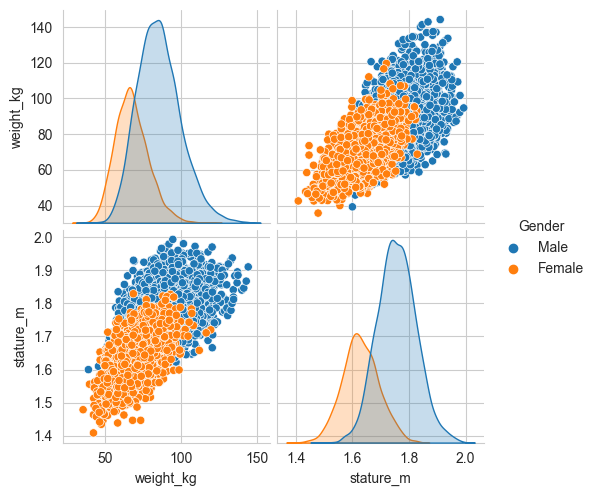

In [7]:
# create pairplot for new dataset after removing column
reduced_df = ansur_df_1.drop('body_height', axis=1)
sns.pairplot(reduced_df, hue='Gender')
plt.show()

# now it looks great!

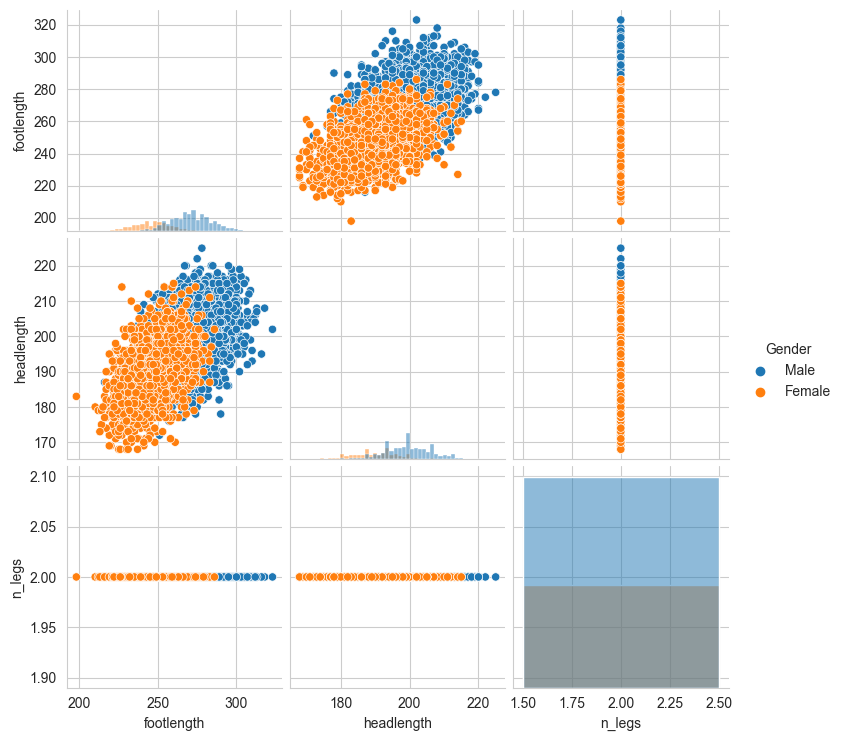

In [8]:
# create pairplot for 'ansur_df_2' to detect redundant features
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')
plt.show()

# variable 'n_legs' has no variance, remove it

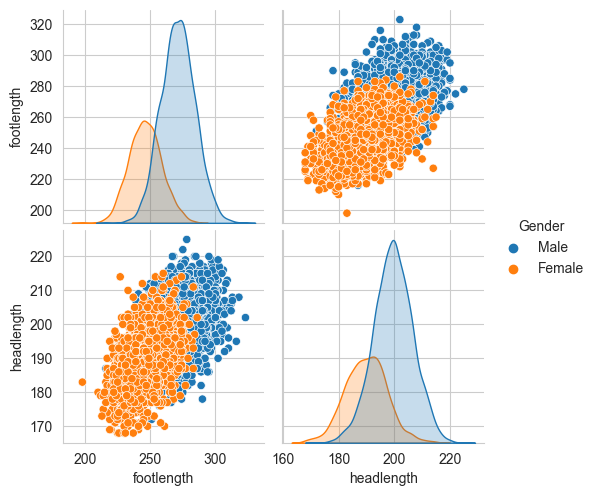

In [9]:
# create pairplot for new dataset after removing column
reduced_df = ansur_df_2.drop('n_legs', axis=1)
sns.pairplot(reduced_df, hue='Gender')
plt.show()

# now it looks great!

#### 1.3 t-SNE visualization of high-dimensional data

* t-SNE full name is **t-Distributed Stochastic Neighbor Embedding**
* It is a powerful technique to visualize high dimensional data using feature extraction

In [10]:
# fitting t-SNE to ANSUR data
import pandas as pd
from sklearn.manifold import TSNE

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])

# remove non-numerical columns
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
df_numeric = ansur_df.drop(non_numeric, axis=1)

# create a t-SNE model
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

E:\PYTHON\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(6068, 2)


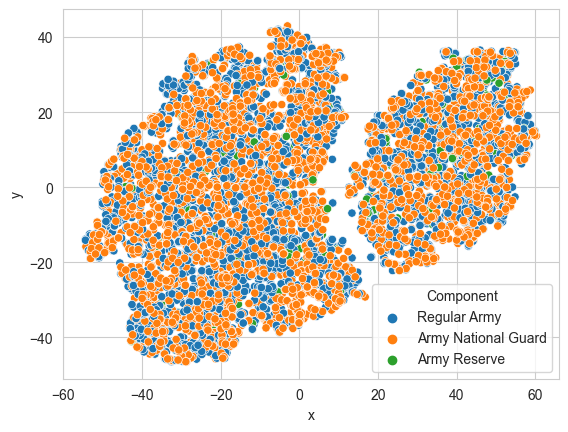

In [11]:
# t-SNE visualization of dimensionality
import seaborn as sns
import matplotlib.pyplot as plt

# add t-SNE features to dataset
ansur_df['x'] = tsne_features[:, 0]
ansur_df['y'] = tsne_features[:, 1]

# make scatterplot with 'Component' as hue
sns.scatterplot(x="x", y="y", hue='Component', data=ansur_df)
plt.show()

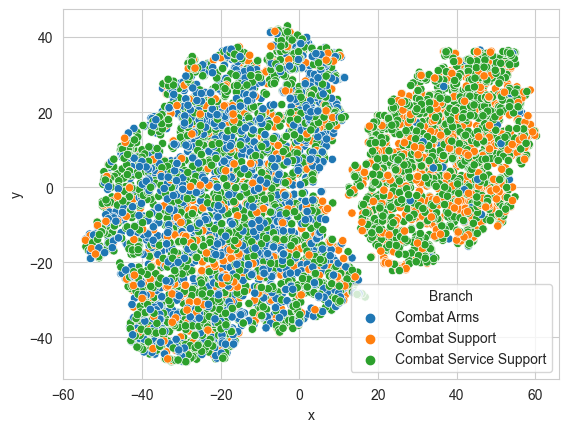

In [12]:
# make scatterplot with 'Branch' as hue
sns.scatterplot(x="x", y="y", hue='Branch', data=ansur_df)
plt.show()

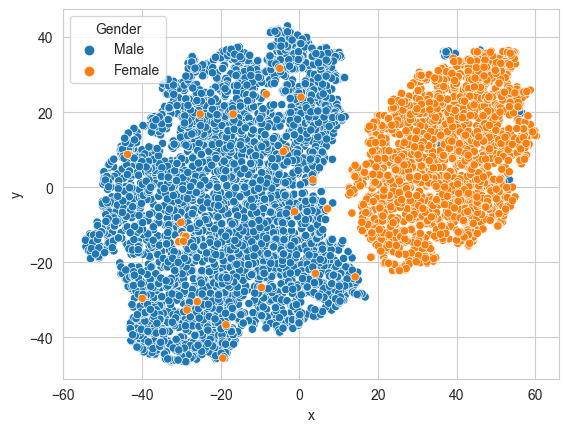

In [13]:
# make scatterplot with 'Gender' as hue
sns.scatterplot(x="x", y="y", hue='Gender', data=ansur_df)
plt.show()

**Conclusion:**

From above plots, we learn that t-SNE found two clusters for male and female. From second plot, we also learn that there are more males in the Combat Arms Branch.

### CHAPTER 2. Feature Selection I - Selecting for Feature Information

#### 2.1 The curse of dimensionality

* Models tend to overfit on high dimensional data
* Number of observations should increase exponentially with the number of features

In [14]:
# train-test split
from sklearn.model_selection import train_test_split
import pandas as pd

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()

# remove non-numerical columns
non_numeric = ['Branch', 'Component', 'BMI_class', 'Height_class']
ansur_df = ansur_df.drop(non_numeric, axis=1)

# extract X, y
y = ansur_df['Gender']
X = ansur_df.drop('Gender', axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 95 Features


In [15]:
# fitting and testing the model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create model
svc = SVC()
svc.fit(X_train, y_train)

# calculate accuracy scores
accuacy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuacy_train))

# it looks like model over-fits a little on training set

99.2% accuracy on test set vs. 99.2% on training set


In [16]:
# accuracy after dimensionality reduction

# assign with only one column to X
X = ansur_df[['neckcircumferencebase']]
y = ansur_df['Gender']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# create model
svc = SVC()
svc.fit(X_train, y_train)

# calculate accuracy scores
accuacy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuacy_train))

# now the model does not over-fit on training set

93.7% accuracy on test set vs. 93.2% on training set


#### 2.2 Features with missing values or little variance

Variance:
* We can use *VarianceThreshold* method to build a selection tool to filter out features with little variance
* Data should be *normalized* before apply this method

Missing values:
* We can count missing values in dataframe columns with *isna()* and *sum()* method
* We can then apply a missing value threshold to the dataset
* When there are not too many missing values, we can use imputations

C:\Users\User\AppData\Local\Temp\ipykernel_30936\3368719791.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df['n_hairs'] = random_array
C:\Users\User\AppData\Local\Temp\ipykernel_30936\3368719791.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df['measurement_error'] = 0.1


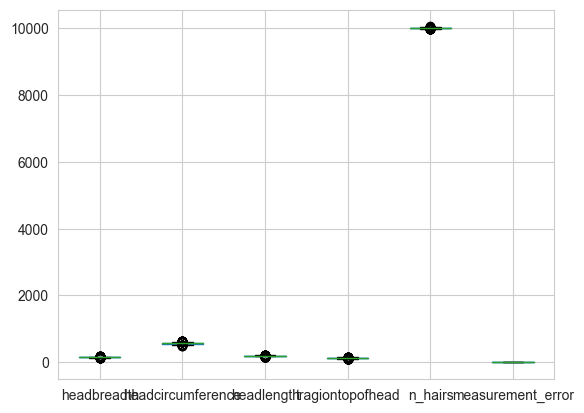

In [17]:
# finding a good variance threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a head_df with variables only related to head
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()
cols = ['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']
head_df = ansur_df[cols]

# create two more columns with little variance
random_array = np.random.normal(loc=10000.0, scale=10.0, size=head_df.shape[0])
head_df['n_hairs'] = random_array
head_df['measurement_error'] = 0.1

# create the boxplot
head_df.boxplot()
plt.show()

# the plot is not readable, we should normalize the data first

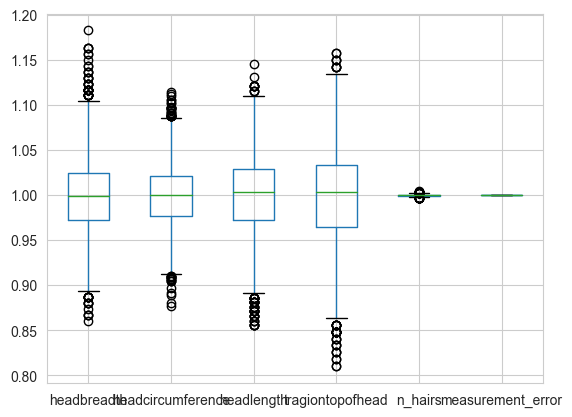

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              9.895570e-07
measurement_error    0.000000e+00
dtype: float64


In [18]:
# normalize the data and make boxplot again
normalized_head_df = head_df / head_df.mean()
normalized_head_df.boxplot()
plt.show()

# print the variances
print(normalized_head_df.var())

# feature 'n_hairs' and 'measurement_error' has low variance and should be removed

In [19]:
# features with low variance
from sklearn.feature_selection import VarianceThreshold

# create a feature selector
sel = VarianceThreshold(threshold=0.001)
sel.fit(head_df / head_df.mean())
mask = sel.get_support()

# get reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))


Dimensionality reduced from 6 to 4.


In [20]:
# removing features with many missing values
import pandas as pd

# get dataset
school_df = pd.read_csv('7_datasets/Public_Schools2.csv')

# create a mask on whether each feature has less than 50% missing values
mask = school_df.isna().sum() / len(school_df) < 0.5

# get reduced dataframe
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

# 2 features were removed with more than 50% missing values

(131, 21)
(131, 19)


#### 2.3 Pairwise correlation

* For feature selection, the next step is to look at *how features relate to another* to decide if they are worth keeping
* The *pairplot()* method we did earlier can help to visualize strongly correlated variables
* **Correlation coefficient** $r$ can help to quantify the correlation between features, we can calculate it with *corr()* method
* The range of $r$ is $(-1, 1)$
* We can visualize the correlation matrix with *heatmap()* method in 'seaborn' library

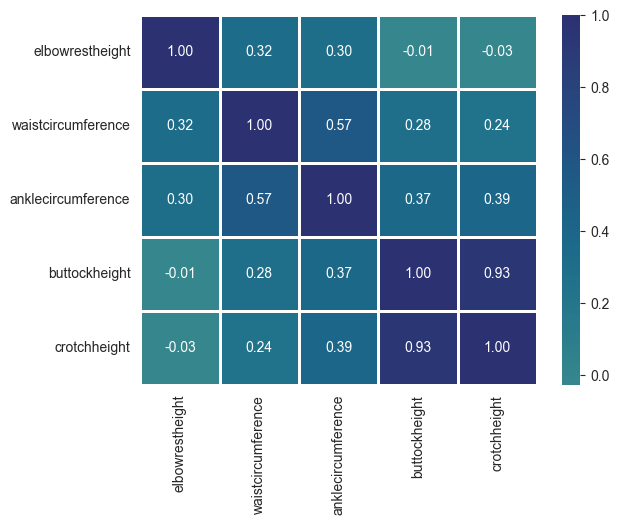

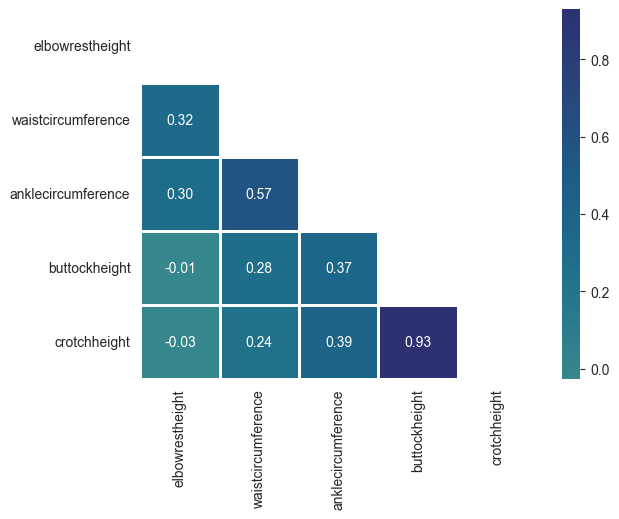

In [21]:
# inspecting correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# get subset dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()
cols = ['elbowrestheight', 'waistcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']
sub_df = ansur_df[cols]

# get the correlation matrix
corr = sub_df.corr()

# visualize the correlation matrix
sns.heatmap(corr, cmap="crest", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# generate a mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# add mask to the heatmap
sns.heatmap(corr, mask=mask, cmap="crest", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#### 2.4 Removing highly correlated features

* For features that are highly correlated, we woud like to keep ONLY one of them
* We can remove these values with a **threshold value**
* Be cafeful when non-linear relations or outliers are involved
* Also, make don't causation with features, one does not lead to another

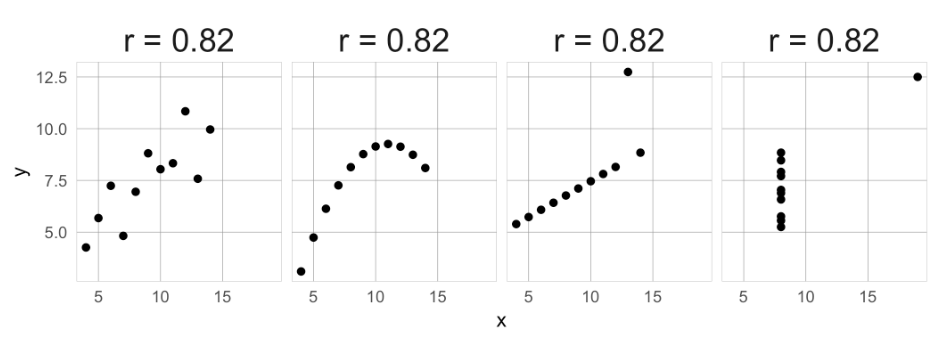

In [22]:
# display plots about misleading correlations
from IPython import display
display.Image("Images/7_correlation_mislead.PNG")

In [23]:
# filtering out highly correlated features
import pandas as pd

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')

# get correlation
corr_matrix = ansur_df_male.corr().abs()

# make a mask to remove upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# drop highly correlate columns
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
reduced_df = ansur_df_male.drop(to_drop, axis=1)

print("The original dataframe has {} columns.".format(ansur_df_male.shape[1]))
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))


The original dataframe has 99 columns.
The reduced dataframe has 88 columns.


C:\Users\User\AppData\Local\Temp\ipykernel_30936\3634838883.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ansur_df_male.corr().abs()


In [24]:
# nuclear energy and pool drownings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# make a dataset by hand
pool_drownings = [421, 465, 494, 538, 430, 530, 511, 600, 582, 605, 603]
nuclear_energy = [728.3, 753.9, 768.8, 780.1, 763.7, 788.5, 782.0, 787.2, 806.4, 806.2, 798.9]

weird_df = pd.DataFrame({'pool_drownings': pool_drownings, 'nuclear_energy': nuclear_energy})
print(weird_df.head())

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


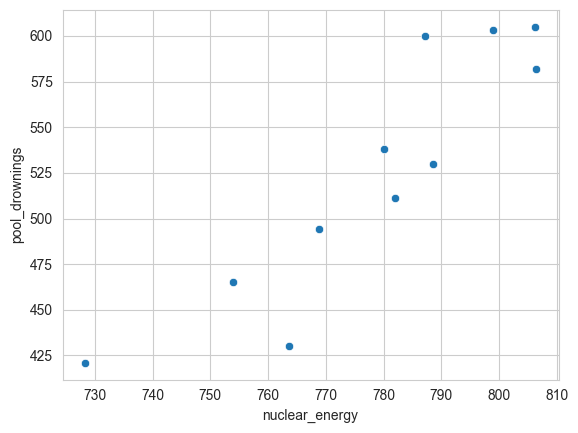

In [25]:
# visualize features
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

In [26]:
# get correlation matrix
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


Be careful, this correlation does not mean causation!

### CHAPTER 3. Feature Selection II - Selecting for Model Accuracy

#### 3.1 Selecting features for model performance

* Another approach to select features is based on how they affect model performance
* For linear models, we should check coefficients and remove the features that contribute little to a model with coefficient close to 0
* 'sklearn' library has a method called **RFE** for Recursive Feature Elimination to just do that for us
* In this method, you can call *support_* and *ranking_* to check more information about which features are kept
* Be aware, dropping one feature might cause changes to other features

In [27]:
# building a diabetes classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# get dataset
diabetes_df = pd.read_csv('7_datasets/PimaIndians.csv')
print(diabetes_df.head())

# split data
X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# scale training data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# create model
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# scale test data
X_test_std = scaler.transform(X_test)
y_pred = lr.predict(X_test_std)

# print result and column coefficients
print("{0:.1f} accuracy on test set.".format(accuracy_score(y_test, y_pred)))
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

   pregnant  glucose  diastolic  triceps  insulin   bmi  family  age      test
0         1       89         66       23       94  28.1   0.167   21  negative
1         0      137         40       35      168  43.1   2.288   33  positive
2         3       78         50       32       88  31.0   0.248   26  positive
3         2      197         70       45      543  30.5   0.158   53  positive
4         1      189         60       23      846  30.1   0.398   59  positive
0.8 accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.23, 'diastolic': 0.03, 'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.38, 'family': 0.35, 'age': 0.34}


In [28]:
# manual recursive feature elimination
# 'diastolic' column was removed
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]
y = diabetes_df['test']

# perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# scale features and fit model
lr.fit(scaler.fit_transform(X_train), y_train)

# calculate the accuracy
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1f} accuracy on test set.".format(acc))
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

0.8 accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


In [29]:
# manual recursive feature elimination (continued)
# 'pregnant' column was removed
X = diabetes_df[['glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]
y = diabetes_df['test']

# perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# scale features and fit model
lr.fit(scaler.fit_transform(X_train), y_train)

# calculate the accuracy
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1f} accuracy on test set.".format(acc))
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

0.8 accuracy on test set.
{'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.38}


In [30]:
# manual recursive feature elimination (continued)
# ONLY keep column with highest coefficient value
X = diabetes_df[['glucose']]
y = diabetes_df['test']

# perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# scale features and fit model
lr.fit(scaler.fit_transform(X_train), y_train)

# calculate the accuracy
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1f} accuracy on test set.".format(acc))
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

0.8 accuracy on test set.
{'glucose': 1.28}


In [31]:
# automatic recursive feature elimination (RFE)
from sklearn.feature_selection import RFE

# get data
X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# create RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# fit RFE
rfe.fit(scaler.fit_transform(X_train), y_train)

# print the features and ranking
print(dict(zip(X.columns, rfe.ranking_)))

# print remaining features
print(X.columns[rfe.support_])

# calculate accuracy
acc = accuracy_score(y_test, rfe.predict(scaler.transform(X_test)))
print("{0:.1f} accuracy on test set.".format(acc))

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 5, 'glucose': 1, 'diastolic': 6, 'triceps': 3, 'insulin': 4, 'bmi': 1, 'family': 2, 'age': 1}
Index(['glucose', 'bmi', 'age'], dtype='object')
0.8 accuracy on test set.


#### 3.2 Tree-based feature selection

* Some models perform *feature selection* by design to avoid overfitting
* One of the examples is **Random Forest**
* It passes different, random, subset of features to a number of decision trees
* Then, the model can calculate **feature importance** values
* We can use these values as a feature selector

In [32]:
# building a random forest model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# get dataset
diabetes_df = pd.read_csv('7_datasets/PimaIndians.csv')
print(diabetes_df.head())

# split data
X = diabetes_df.drop('test', axis=1)
y = diabetes_df['test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# build RF model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# calculate accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

print(dict(zip(X.columns, rf.feature_importances_.round(2))))
print("{0:.1} accuracy on test set.".format(acc) )

   pregnant  glucose  diastolic  triceps  insulin   bmi  family  age      test
0         1       89         66       23       94  28.1   0.167   21  negative
1         0      137         40       35      168  43.1   2.288   33  positive
2         3       78         50       32       88  31.0   0.248   26  positive
3         2      197         70       45      543  30.5   0.158   53  positive
4         1      189         60       23      846  30.1   0.398   59  positive
{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
0.8 accuracy on test set.


In [33]:
# random forest for feature selection
mask = rf.feature_importances_ > 0.15

# apply the mask
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Index(['glucose'], dtype='object')


In [34]:
# Recursive Feature Elimination (RFE) with random forests
from sklearn.feature_selection import RFE

# create RFE model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# fit model
rfe.fit(X_train, y_train)

# create mask
mask = rfe.support_

# apply mask
reduced_X = X.loc[:, mask]
print(reduced_X.columns)


Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'age'], dtype='object')


#### 3.3 Regularized linear regression

* For linear regression, it tries to minimize the loss function: Mean Squared Error (MSE)
* To avoid over-fitting, we introduce **regularization**
* It will try to not only make the model accurate, but also make the model simple (keeping the coefficients low)
* The term is $\alpha$
* If it is too low, the model might over-fit
* If it is too high, the model might be too simple and inaccurate
* One model has this is called **Lasso**

In [35]:
# creating a LASSO regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# get dataset
df = pd.read_csv('7_datasets/ANSUR_male.csv')
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
df_numeric = df.drop(non_numeric, axis=1)

X = df_numeric.drop('BMI', axis=1)
y = df_numeric['BMI']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# scale train data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# create Lasso model
la = Lasso()
la.fit(X_train_std, y_train)

# scale test data
X_test_std = scaler.transform(X_test)

# calculate coefficient of determination (R squared)
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# create a list that has True when coefficient is 0
zero_coef = la.coef_ == 0

# get zero coefficients features
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 84.7% of the variance in the test set.
The model has ignored 84 out of 93 features.


In [36]:
# adjusting the regularization strength
# find the highest alpha value that gives an R-squared score above 98%

values = [1, 0.5, 0.1, 0.01]

# create for loop for different alpha values
for value in values:
    la = Lasso(alpha=value, random_state=0)
    la.fit(X_train_std, y_train)
    r_squared = la.score(X_test_std, y_test)
    n_ignored_features = sum(la.coef_ == 0)

    # print stats
    print("Alpha value: ", value)
    print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
    print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))
# we should choose 0.1.

Alpha value:  1
The model can predict 84.7% of the variance in the test set.
84 out of 93 features were ignored.
Alpha value:  0.5
The model can predict 93.8% of the variance in the test set.
81 out of 93 features were ignored.
Alpha value:  0.1
The model can predict 99.2% of the variance in the test set.
75 out of 93 features were ignored.
Alpha value:  0.01
The model can predict 99.5% of the variance in the test set.
53 out of 93 features were ignored.


#### 3.4 Combining feature selectors

* LassoCV() can automatically find the optimal $\alpha$ value
* Random Forest is combination of decision trees, we can use combination of models for feature selection, too
* Gradient boosting act similar to Random Forest, it is an ensemble method
* Each model has a feature selection, we can use the vote to determine which feature to keep

In [37]:
# creating a LassoCV regressor
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# get dataset
df = pd.read_csv('7_datasets/ANSUR_male.csv')

# get subset
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
df_numeric = df.drop(non_numeric, axis=1)
df_subset = df_numeric.iloc[:1000, :33]
print(df_subset.shape)

# extract and split data
X = df_subset.drop('bicepscircumferenceflexed', axis=1)
y = df_subset['bicepscircumferenceflexed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# scale train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

(1000, 33)


In [38]:
# 1)create LassoCV model
lcv = LassoCV()
lcv.fit(X_train_scaled, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# scale test data
X_test_scaled = scaler.transform(X_test)

# calculate R-squared on the test set
r_squared = lcv.score(X_test_scaled, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ !=0
print('{} features out of {} selected.'.format(sum(lcv_mask), len(lcv_mask)))
# 28 out of 32 features were selected

Optimal alpha = 0.068
The model explains 76.9% of the test set variance
28 features out of 32 selected.


In [39]:
# ensemble models for extra votes (only 10 features to select)
# 2) Gradient Boosting model
rfe_gb = RFE(GradientBoostingRegressor(), n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train_scaled, y_train)

# calculate R squared
r_squared = rfe_gb.score(X_test_scaled, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# assign mask
gb_mask = rfe_gb.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 71.4% of the variance in the test set


In [40]:
# 3) Random Forest model
rfe_rf = RFE(RandomForestRegressor(), n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train_scaled, y_train)

# calculate R squared
r_squared = rfe_rf.score(X_test_scaled, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# assign mask
rf_mask = rfe_rf.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 69.7% of the variance in the test set


In [41]:
# sum the votes
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

# meta mask
meta_mask = votes >=3

# apply mask
X_reduced = X.loc[:, meta_mask]

# use reduced df to fit a regression model
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm = LinearRegression()
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

# we just used 9 feature to achieve a high accuracy!

[2 0 1 1 1 1 1 1 3 3 1 3 3 1 3 1 1 1 1 3 0 3 3 3 1 1 0 0 1 1 1 2]
The model can explain 74.3% of the variance in the test set using 9 features.


### CHAPTER 4. Feature Extraction

#### 4.1 Feature extraction

* It is calculating new features based on existing features and loss as little information as possible
* Feature extraction creates no features, it is just combination of the original ones
* There are powerful algorithms that calculate new features, but not in this course
* Sometimes, you can combine multiple features into a new feature that makes the original ones obsolete
    * example: BMI vs. height + weight
    * example: averages vs. left + right
* Intro to PCA:
    * You need to scale the data first
    * In a cluster of data, add a vector in the direction of the strongest pattern
    * Add second vector perpendicular to the first vector
    * The new coordinates that each point has are called **principal components**

In [43]:
# manual feature extraction (I)
import pandas as pd

# get dataset
sales_df = pd.read_csv('7_datasets/grocery_sales.csv')

# calculate 'price' column
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# drop 'quantity' and 'revenue' column
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)
print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [45]:
# manual feature extraction (II)

# create data by hand
height_1 = [1.78, 1.7, 1.74, 1.66, 1.91, 1.72, 1.81, 1.85, 1.78, 1.81, 1.78, 1.73, 1.81, 1.86, 1.71, 1.74, 1.69, 1.77, 1.75, 1.79, 1.78, 1.68, 1.65, 1.96, 1.76, 1.63, 1.82, 1.8, 1.74, 1.82, 1.88, 1.76, 1.68, 1.85, 1.78, 1.79, 1.68, 1.85, 1.74, 1.74, 1.74, 1.68, 1.84, 1.73, 1.76, 1.67, 1.74, 1.71, 1.88, 1.67, 1.78, 1.84, 1.64, 1.75, 1.7, 1.84, 1.78, 1.75, 1.7, 1.85, 1.61, 1.71, 1.84, 1.68, 1.74, 1.7, 1.67, 1.85, 1.75, 1.62, 1.77, 1.7, 1.62, 1.73, 1.84, 1.74, 1.67, 1.75, 1.82, 1.8, 1.75, 1.72, 1.81, 1.79, 1.72, 1.58, 1.72, 1.8, 1.74, 1.7, 1.74, 1.73, 1.78, 1.82, 1.84, 1.79, 1.66, 1.7, 1.79, 1.76]

height_2 = [1.8, 1.7, 1.75, 1.68, 1.93, 1.71, 1.82, 1.85, 1.78, 1.81, 1.78, 1.74, 1.82, 1.86, 1.71, 1.74, 1.7, 1.77, 1.75, 1.78, 1.75, 1.69, 1.66, 1.95, 1.78, 1.62, 1.82, 1.8, 1.76, 1.83, 1.88, 1.76, 1.67, 1.83, 1.78, 1.79, 1.69, 1.86, 1.74, 1.74, 1.73, 1.67, 1.82, 1.75, 1.75, 1.67, 1.73, 1.72, 1.86, 1.67, 1.77, 1.84, 1.63, 1.74, 1.7, 1.84, 1.78, 1.75, 1.69, 1.85, 1.6, 1.71, 1.83, 1.66, 1.74, 1.7, 1.65, 1.85, 1.74, 1.62, 1.78, 1.7, 1.63, 1.72, 1.84, 1.73, 1.66, 1.74, 1.82, 1.8, 1.74, 1.73, 1.81, 1.77, 1.73, 1.6, 1.73, 1.8, 1.73, 1.71, 1.74, 1.74, 1.78, 1.83, 1.84, 1.8, 1.66, 1.72, 1.79, 1.76]

height_3 = [1.8, 1.69, 1.73, 1.67, 1.9, 1.74, 1.81, 1.84, 1.8, 1.82, 1.8, 1.74, 1.8, 1.88, 1.71, 1.75, 1.7, 1.77, 1.76, 1.8, 1.78, 1.67, 1.65, 1.97, 1.75, 1.63, 1.82, 1.82, 1.75, 1.82, 1.87, 1.77, 1.67, 1.85, 1.77, 1.8, 1.69, 1.85, 1.74, 1.73, 1.73, 1.68, 1.84, 1.74, 1.78, 1.68, 1.73, 1.72, 1.87, 1.67, 1.78, 1.86, 1.63, 1.74, 1.7, 1.83, 1.79, 1.74, 1.69, 1.85, 1.61, 1.73, 1.85, 1.68, 1.73, 1.71, 1.66, 1.83, 1.76, 1.62, 1.78, 1.7, 1.63, 1.72, 1.83, 1.75, 1.66, 1.74, 1.82, 1.8, 1.75, 1.71, 1.8, 1.77, 1.73, 1.56, 1.71, 1.8, 1.73, 1.72, 1.73, 1.73, 1.78, 1.81, 1.85, 1.79, 1.67, 1.71, 1.81, 1.77]

height_df = pd.DataFrame({'height_1': height_1, 'height_2': height_2, 'height_3': height_3})

# calculate mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# drop 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)
print(reduced_df.head())

     height
0  1.793333
1  1.696667
2  1.740000
3  1.670000
4  1.913333


#### 4.2 Principal component analysis (PCA)

* Use *PCA()* method in 'sklearn' library to calculate principal components in each data
* then use 'fit_transform' method to transform the data
* The principal components share no duplicate information
* They are ranked from most to least important
* use *explained_variance_ratio_* attribute to show the variance ratio explained
* use *cumsum()* method to calculate the cumulative ratio explained

(250, 4)
   stature_m  buttockheight  waistcircumference  shouldercircumference
0      1.776            882                 933                   1151
1      1.702            870                 870                   1119
2      1.735            901                 964                   1276
3      1.655            821                 857                   1155
4      1.914           1080                 868                   1231


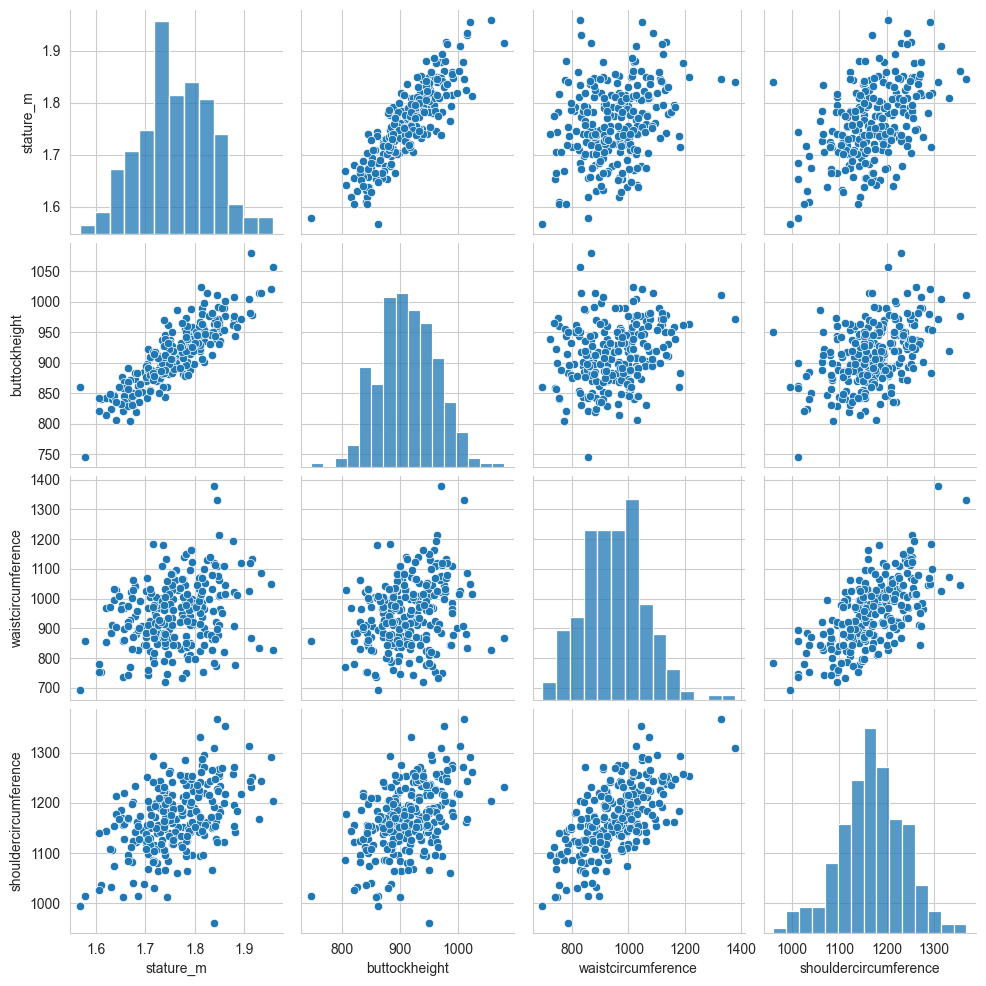

In [51]:
# calculating Principal Components
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')

cols = ['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']

df = ansur_df_male.loc[:249, cols]
print(df.shape)
print(df.head())

# create a pairplot
sns.pairplot(df)
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scale data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# create PCA and get PC
pca = PCA()
pc = pca.fit_transform(df_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
print(pc_df.head())

# get variance ratio
print(pca.explained_variance_ratio_)
print((pca.explained_variance_ratio_).cumsum())

       PC 1      PC 2      PC 3      PC 4
0  0.409961  0.015279  0.101298 -0.586143
1  1.567830  0.043638 -0.091905 -0.056078
2 -0.534760 -0.998495 -1.212991  0.012071
3  2.218024 -0.830341 -0.740261 -0.320304
4 -3.087678  2.558020 -0.610794  0.735838
[0.62393205 0.26369476 0.08019    0.03218318]
[0.62393205 0.88762682 0.96781682 1.        ]


#### 4.3 PCA applications

* You need to decide how much of explained variance you are willing to sacrifice
* Disadvantage: Principal Components are hard to interpret
* To help to understand the components, look at *pca.components_* attribute
* Then we can check the effect of categorical features on these components via data visualization tools/ plots
* NOTE: PAC can be put into a model pipeline

In [60]:
# understanding the components
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# get dataset
pokemon_df = pd.read_csv('7_datasets/pokemon.csv')

numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
poke_df = pokemon_df.loc[:, numeric_cols]

# build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# fit it to dataset
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


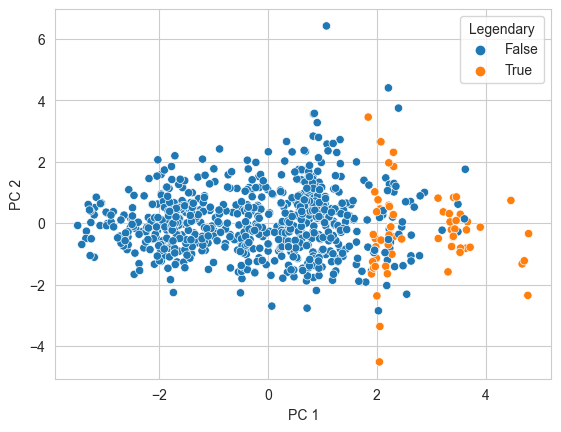

In [63]:
# PCA for feature exploration
# use same dataset as above exercise
import seaborn as sns
import matplotlib.pyplot as plt

# build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# fit the pipeline
pc = pipe.fit_transform(poke_df)
print(pc)

# add components to poke_cat_df
cat_cols=['Type 1', 'Legendary']
poke_cat_df = pokemon_df.loc[:, cat_cols]
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# use the Legendary feature to color scatterplot
sns.scatterplot(data=poke_cat_df, x='PC 1', y= 'PC 2', hue='Legendary')
plt.show()

In [66]:
# PCA in a model pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# get dataset
pokemon_df = pd.read_csv('7_datasets/pokemon.csv')
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = pokemon_df.loc[:, numeric_cols]
y = pokemon_df['Legendary']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=3)),
                 ('classifier', RandomForestClassifier(random_state=0))])

# fit it to training data
pipe.fit(X_train, y_train)

# calculate accuracy
accuracy = pipe.score(X_test, y_test)
print('{0:.1%} test set accuracy.'.format(accuracy))

# get variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)


93.8% test set accuracy.
[0.45673596 0.18599109 0.12852181]


#### 4.4 Principal Component selection

* An alternative of selecting principal components is telling PCA the minimal proportion of variance we want to keep and let the algorithm decide on the number of components it needs
* We do this passing a number *0-1* on parameter *n_components*
* There is a trick to find an optimal number of components is to **plot the explaiend variance ratio** of a fitted PCA
* You need to idenfity the 'Elbow' in the plot

How to go back from principal components to original features?
* Use 'pca.inverse_transform(pc)' method
* However, there will be some information loss during this process

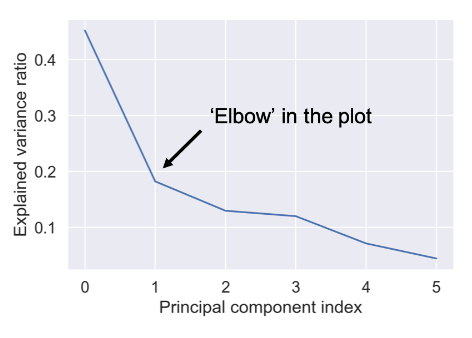

In [68]:
# show plot of elbow
from IPython import display
display.Image('Images/7_pac_elbow.PNG')

In [72]:
# selecting proportion of variance to keep
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# get the dataset
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
df_numeric = ansur_df_female.drop(non_numeric, axis=1)
print(df_numeric.shape)

# create a pipeline selecting 80% variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.8))])

# fit it to data
pipe.fit(df_numeric)
print('{} components selected.'.format(len(pipe.steps[1][1].components_)))

# create a pipeline selecting 90% variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.9))])

# fit it to data
pipe.fit(df_numeric)
print('{} components selected.'.format(len(pipe.steps[1][1].components_)))

(1986, 94)
11 components selected.
23 components selected.


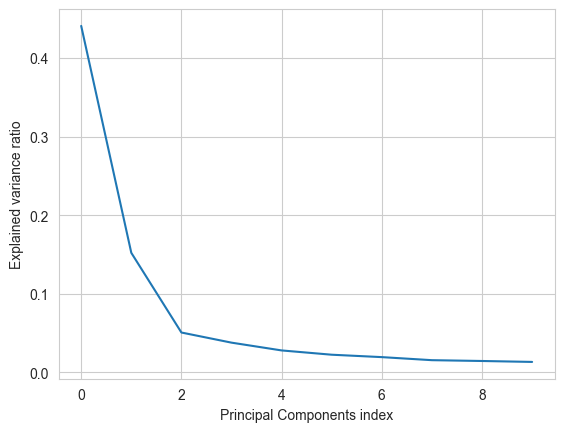

In [73]:
# choosing the number of components with plot

# create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

# fit it to data
pipe.fit(df_numeric)

# plot the variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)
plt.xlabel('Principal Components index')
plt.ylabel('Explained variance ratio')
plt.show()

# we should select 3 components because the plot is 0-indexed and the elbow is on number '2'!

This is the end of this course!